## Imports

In [81]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## Load the Data 

In [82]:
student_data = pd.read_csv(r'C:\Users\Desktop\USF-DS\educationstats.csv')

In [83]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 41 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      4424 non-null   int64  
 1   Marital status                                  4424 non-null   int64  
 2   Application mode                                4424 non-null   int64  
 3   Application order                               4424 non-null   int64  
 4   Course                                          4424 non-null   int64  
 5   Daytime/evening attendance	                     4424 non-null   int64  
 6   Previous qualification                          4424 non-null   int64  
 7   Previous qualification (grade)                  4424 non-null   float64
 8   Nacionality                                     4424 non-null   int64  
 9   Mother's qualification                   

In [84]:
student_data.head()

,Unnamed: 0,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Country Name,Adj net enrollment of lower secondary,Tertiary educ enrollment(all programs)
0,0,1,17,5,171,1,1,122.0,1,19,...,0,0.000000,0,10.8,1.4,1.74,Dropout,Portugal,85.185539,362200.0
1,1,1,15,1,9254,1,1,160.0,1,1,...,6,13.666667,0,13.9,-0.3,0.79,Graduate,Portugal,85.185539,362200.0
2,2,1,1,5,9070,1,1,122.0,1,37,...,0,0.000000,0,10.8,1.4,1.74,Dropout,Portugal,85.185539,362200.0
3,3,1,17,2,9773,1,1,122.0,1,38,...,5,12.400000,0,9.4,-0.8,-3.12,Graduate,Portugal,85.185539,362200.0
4,4,2,39,1,8014,0,1,100.0,1,37,...,6,13.000000,0,13.9,-0.3,0.79,Graduate,Portugal,85.185539,362200.0


## Exploring the Data 

#### Summary Stats 

In [85]:
student_data.describe()

,Unnamed: 0,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Adj net enrollment of lower secondary,Tertiary educ enrollment(all programs)
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4.424000e+03
mean,2211.500000,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,...,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,85.080939,4.387710e+05
std,1277.243125,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,...,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,2.541158,7.290486e+05
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,16.120781,1.339700e+04
25%,1105.750000,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,...,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,85.185539,3.622000e+05
50%,2211.500000,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,85.185539,3.622000e+05
75%,3317.250000,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,85.185539,3.622000e+05
max,4423.000000,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,99.405693,8.072146e+06


In [86]:
# Count of participants per country 
student_data.value_counts('Country Name')

Country Name
Portugal          4314
Brazil              38
Soa Tome            14
Cabo Verde          13
Spain               13
Guinea               5
Moldova              3
Ukraine              3
Italy                3
Russia               2
Romania              2
Anogola              2
Mozambique           2
Mexico               2
Germany              2
Netherlands          1
Lithuania            1
Cuba                 1
Turkey               1
Colombia             1
United Kingdom       1
dtype: int64

In [87]:
participants = pd.DataFrame(student_data['Country Name'].value_counts(normalize=True))
print(participants)

                Country Name
Portugal            0.975136
Brazil              0.008590
Soa Tome            0.003165
Cabo Verde          0.002939
Spain               0.002939
Guinea              0.001130
Moldova             0.000678
Italy               0.000678
Ukraine             0.000678
Anogola             0.000452
Mexico              0.000452
Romania             0.000452
Mozambique          0.000452
Germany             0.000452
Russia              0.000452
Turkey              0.000226
Netherlands         0.000226
Colombia            0.000226
Cuba                0.000226
United Kingdom      0.000226
Lithuania           0.000226


In [88]:
# Reset index by nationality('Counrty Name') 
student_success = student_data.set_index('Country Name')

In [89]:
student_success.head()

,Unnamed: 0,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Adj net enrollment of lower secondary,Tertiary educ enrollment(all programs)
Country Name,,,,,,,,,,,,,,,,,,,,,
Portugal,0,1,17,5,171,1,1,122.0,1,19,...,0,0,0.000000,0,10.8,1.4,1.74,Dropout,85.185539,362200.0
Portugal,1,1,15,1,9254,1,1,160.0,1,1,...,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,85.185539,362200.0
Portugal,2,1,1,5,9070,1,1,122.0,1,37,...,0,0,0.000000,0,10.8,1.4,1.74,Dropout,85.185539,362200.0
Portugal,3,1,17,2,9773,1,1,122.0,1,38,...,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,85.185539,362200.0
Portugal,4,2,39,1,8014,0,1,100.0,1,37,...,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,85.185539,362200.0


In [90]:
# Renaming column : 'Unnamed: 0' to 'Student ID'
student_success.rename(columns = {'Unnamed: 0':'Student ID'}, inplace = True)

In [91]:
student_success.head()

,Student ID,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Adj net enrollment of lower secondary,Tertiary educ enrollment(all programs)
Country Name,,,,,,,,,,,,,,,,,,,,,
Portugal,0,1,17,5,171,1,1,122.0,1,19,...,0,0,0.000000,0,10.8,1.4,1.74,Dropout,85.185539,362200.0
Portugal,1,1,15,1,9254,1,1,160.0,1,1,...,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,85.185539,362200.0
Portugal,2,1,1,5,9070,1,1,122.0,1,37,...,0,0,0.000000,0,10.8,1.4,1.74,Dropout,85.185539,362200.0
Portugal,3,1,17,2,9773,1,1,122.0,1,38,...,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,85.185539,362200.0
Portugal,4,2,39,1,8014,0,1,100.0,1,37,...,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,85.185539,362200.0


#### Education stats per Country 

In [92]:
# Secondary Education stats ( Top 5)
secondary_educ = student_success['Adj net enrollment of lower secondary'].drop_duplicates()
secondary_educ.sort_values(ascending=False).head()

Country Name
Lithuania         99.405693
United Kingdom    96.082527
Spain             94.076622
Ukraine           93.078461
Romania           89.185013
Name: Adj net enrollment of lower secondary, dtype: float64

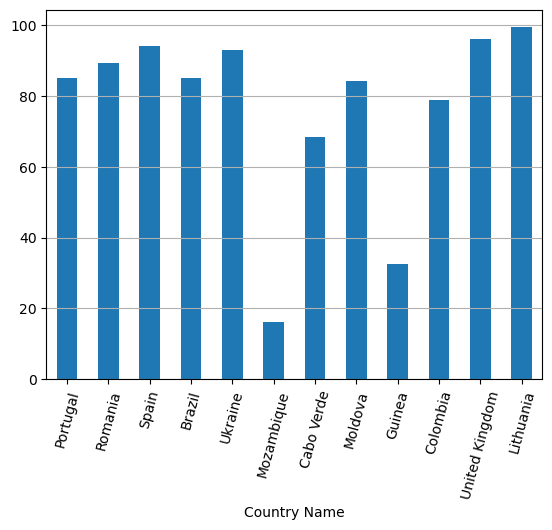

In [93]:
# Bar plot of secondary education 
ax = secondary_educ.plot.bar(x='Country', rot=75)
ax.grid(axis='y')

In [94]:
# Tertiary education Stats ( Top 5) 
tertiary_educ = student_success['Tertiary educ enrollment(all programs)'].drop_duplicates()
tertiary_educ.sort_values(ascending=False).head()

Country Name
Brazil            8072146.00
Turkey            5472521.00
Mexico            3419391.00
Germany           2912203.50
United Kingdom    2352932.75
Name: Tertiary educ enrollment(all programs), dtype: float64

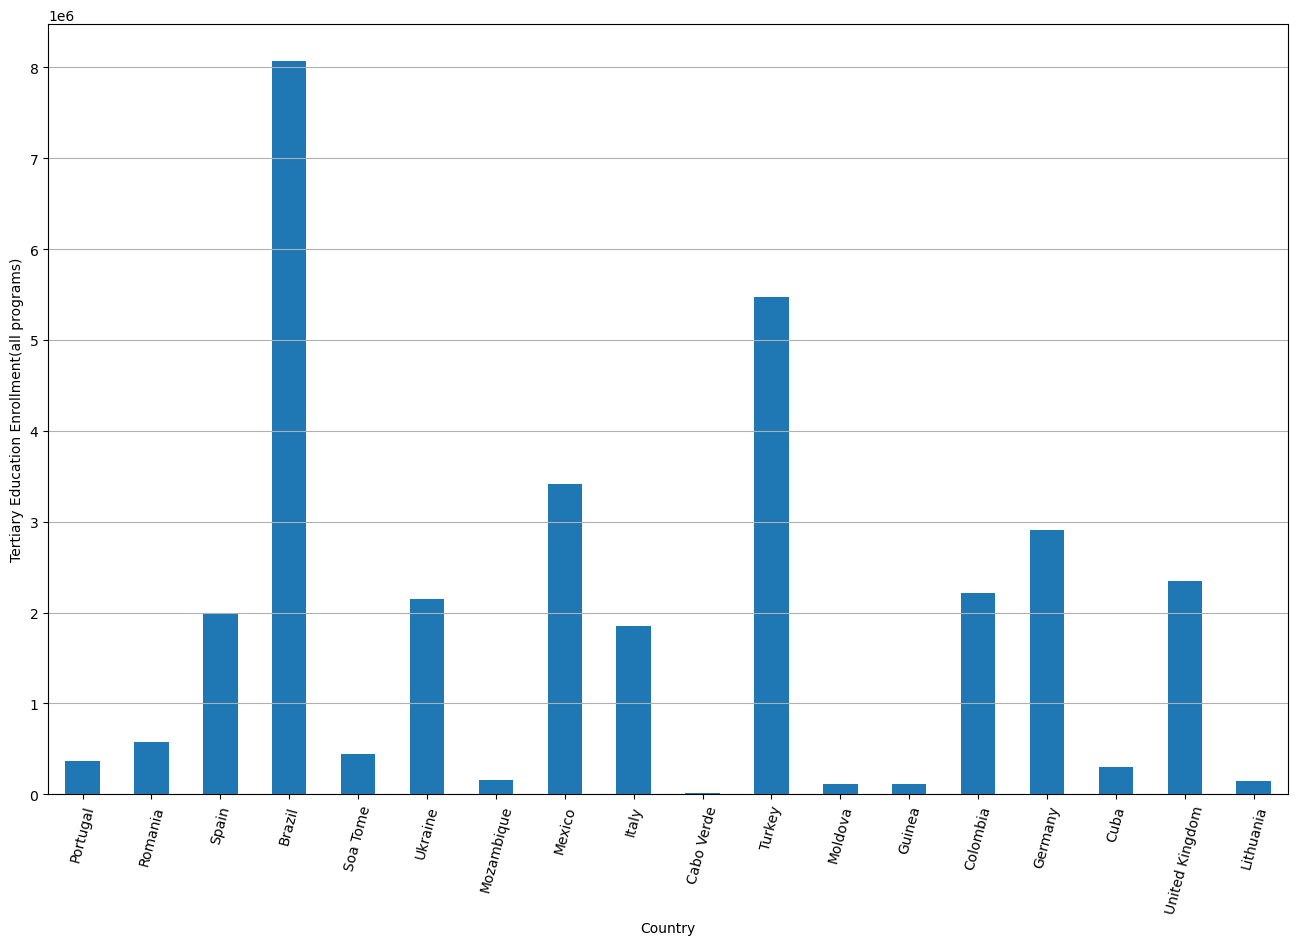

In [95]:
# Bar plot of Tertiary education 
ax = tertiary_educ.plot.bar(x='Country', rot=75, figsize=(16,10))
ax.set_ylabel('Tertiary Education Enrollment(all programs)')
ax.set_xlabel('Country')
ax.grid(axis='y')

###### Admisson grade per country 

In [96]:
# Enrollment grades per participants per counrty 
admis_grade = student_success["Admission grade"]
admis_grade

Country Name
Portugal      127.3
Portugal      142.5
Portugal      124.8
Portugal      119.6
Portugal      141.5
              ...  
Portugal      122.2
Russia        119.0
Portugal      149.5
Portugal      153.8
Cabo Verde    152.0
Name: Admission grade, Length: 4424, dtype: float64

In [98]:
admis_grade['Portugal'].mean()

126.91968011126565

In [99]:
admis_grade['Brazil'].mean()

121.17631578947368

In [100]:
admis_grade['Soa Tome'].mean()

132.80714285714285

In [101]:
admis_grade['Cabo Verde'].mean()

143.4923076923077

In [102]:
admis_grade['Spain'].mean()

128.55384615384617

In [103]:
admis_grade['Guinea'].mean()

124.38

In [239]:
admis_grade = pd.DataFrame(admis_grade)
admis_grade.reset_index(inplace=True)

In [240]:
admis_grade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            4424 non-null   int64  
 1   Country Name     4424 non-null   object 
 2   Admission grade  4424 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 103.8+ KB


In [244]:
admis_grade.head()

,index,Country Name,Admission grade
0,0,Portugal,127.3
1,1,Portugal,142.5
2,2,Portugal,124.8
3,3,Portugal,119.6
4,4,Portugal,141.5


Text(0.5, 1.0, 'Admission Grades per Country')

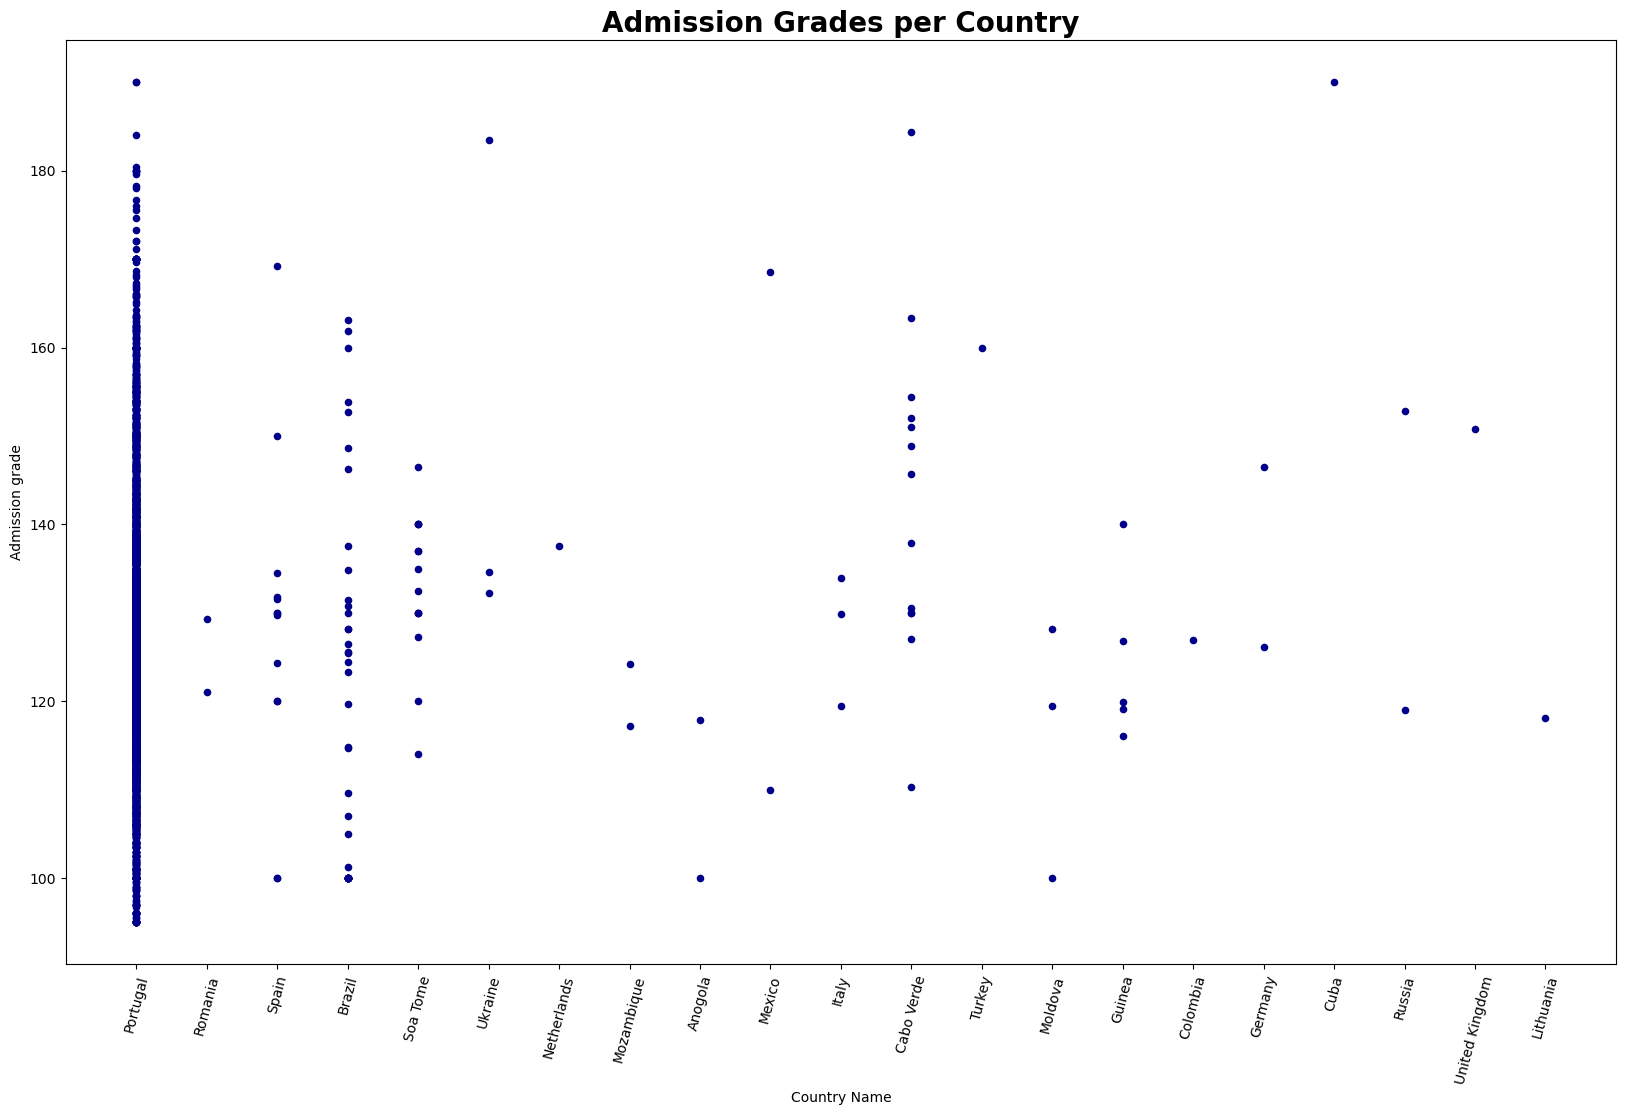

In [257]:
# Scatterplot of admisssion grades per country 
ax1 = admis_grade.plot.scatter(x='Country Name',y='Admission grade', c='DarkBlue', figsize=(20,12), rot=75)
plt.title('Admission Grades per Country', fontsize=20, weight='bold')

###### Graduate / Drop-Out Analysis 

In [105]:
# Student succes 
student_success['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [106]:
# Student success per country 
grad_per_country = student_success['Target'].copy()
grad_per_country= pd.DataFrame(grad_per_country)
grad_per_country.reset_index(inplace=True)
grad_per_country

,Country Name,Target
0,Portugal,Dropout
1,Portugal,Graduate
2,Portugal,Dropout
3,Portugal,Graduate
4,Portugal,Graduate
...,...,...
4419,Portugal,Graduate
4420,Russia,Dropout
4421,Portugal,Dropout
4422,Portugal,Graduate


In [107]:
# Amount of students drop-out per country 
print(grad_per_country[grad_per_country["Target"] == "Dropout"].value_counts())

Country Name  Target 
Portugal      Dropout    1389
Brazil        Dropout      14
Cabo Verde    Dropout       4
Spain         Dropout       4
Moldova       Dropout       2
Anogola       Dropout       1
Colombia      Dropout       1
Guinea        Dropout       1
Lithuania     Dropout       1
Mexico        Dropout       1
Russia        Dropout       1
Soa Tome      Dropout       1
Ukraine       Dropout       1
dtype: int64


In [108]:
# Amount of students drop-out per country - relative values 
print(grad_per_country[grad_per_country["Target"] == "Dropout"].value_counts(normalize=True))

Country Name  Target 
Portugal      Dropout    0.977481
Brazil        Dropout    0.009852
Cabo Verde    Dropout    0.002815
Spain         Dropout    0.002815
Moldova       Dropout    0.001407
Anogola       Dropout    0.000704
Colombia      Dropout    0.000704
Guinea        Dropout    0.000704
Lithuania     Dropout    0.000704
Mexico        Dropout    0.000704
Russia        Dropout    0.000704
Soa Tome      Dropout    0.000704
Ukraine       Dropout    0.000704
dtype: float64


In [109]:
# Amount of students graduated per country 
print(grad_per_country[grad_per_country["Target"] == "Graduate"].value_counts())

Country Name    Target  
Portugal        Graduate    2155
Brazil          Graduate      18
Cabo Verde      Graduate       8
Soa Tome        Graduate       8
Guinea          Graduate       4
Spain           Graduate       4
Italy           Graduate       3
Germany         Graduate       2
Ukraine         Graduate       2
Mexico          Graduate       1
Mozambique      Graduate       1
Netherlands     Graduate       1
Romania         Graduate       1
United Kingdom  Graduate       1
dtype: int64


In [110]:
# Amount of students graduated per country - relative values 
print(grad_per_country[grad_per_country["Target"] == "Graduate"].value_counts(normalize=True))

Country Name    Target  
Portugal        Graduate    0.975555
Brazil          Graduate    0.008148
Cabo Verde      Graduate    0.003622
Soa Tome        Graduate    0.003622
Guinea          Graduate    0.001811
Spain           Graduate    0.001811
Italy           Graduate    0.001358
Germany         Graduate    0.000905
Ukraine         Graduate    0.000905
Mexico          Graduate    0.000453
Mozambique      Graduate    0.000453
Netherlands     Graduate    0.000453
Romania         Graduate    0.000453
United Kingdom  Graduate    0.000453
dtype: float64


In [111]:
# Amount of students enrolled per country - 
print(grad_per_country[grad_per_country["Target"] == "Enrolled"].value_counts())

Country Name  Target  
Portugal      Enrolled    770
Brazil        Enrolled      6
Soa Tome      Enrolled      5
Spain         Enrolled      5
Anogola       Enrolled      1
Cabo Verde    Enrolled      1
Cuba          Enrolled      1
Moldova       Enrolled      1
Mozambique    Enrolled      1
Romania       Enrolled      1
Russia        Enrolled      1
Turkey        Enrolled      1
dtype: int64


In [112]:
# Amount of students enrolled per country - relative value 
print(grad_per_country[grad_per_country["Target"] == "Enrolled"].value_counts(normalize=True))

Country Name  Target  
Portugal      Enrolled    0.969773
Brazil        Enrolled    0.007557
Soa Tome      Enrolled    0.006297
Spain         Enrolled    0.006297
Anogola       Enrolled    0.001259
Cabo Verde    Enrolled    0.001259
Cuba          Enrolled    0.001259
Moldova       Enrolled    0.001259
Mozambique    Enrolled    0.001259
Romania       Enrolled    0.001259
Russia        Enrolled    0.001259
Turkey        Enrolled    0.001259
dtype: float64


###### Scholarship Holders per Country 

In [200]:
# Dataframe of scholarship holders and graduates/drop outs per country 
scholars_per_country = student_success[['Scholarship holder','Target']]
scholars_per_country= pd.DataFrame(scholars_per_country)
scholars_per_country
scholars_per_country.reset_index(inplace=True)

In [201]:
scholars_per_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country Name        4424 non-null   object
 1   Scholarship holder  4424 non-null   int64 
 2   Target              4424 non-null   object
dtypes: int64(1), object(2)
memory usage: 103.8+ KB


<Axes: title={'center': 'Scholarship Holders and Graduate/Drop-Out'}, xlabel='Scholarship holder'>

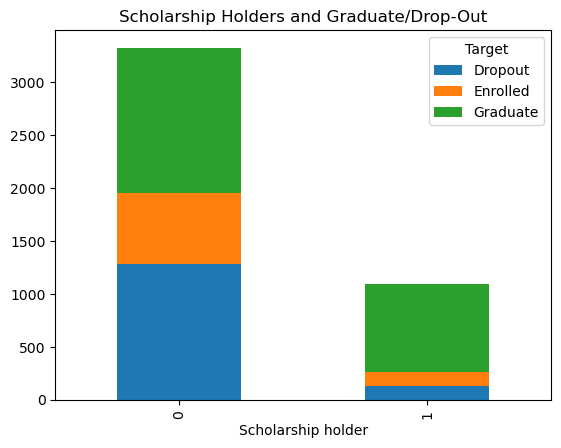

In [219]:
# 1 – yes 0 – n
scholars_per_country.groupby(['Scholarship holder', 'Target']).size().unstack().plot(kind='bar', stacked=True, title='Scholarship Holders and Graduate/Drop-Out')

In [202]:
scholars_per_country.value_counts()

Country Name    Scholarship holder  Target  
Portugal        0                   Graduate    1335
                                    Dropout     1258
                1                   Graduate     820
                0                   Enrolled     641
                1                   Dropout      131
                                    Enrolled     129
Brazil          0                   Dropout       13
                                    Graduate      11
Soa Tome        0                   Graduate       8
Cabo Verde      0                   Graduate       7
Brazil          1                   Graduate       7
                0                   Enrolled       5
Spain           0                   Enrolled       5
Soa Tome        0                   Enrolled       5
Spain           0                   Graduate       4
                                    Dropout        4
Cabo Verde      0                   Dropout        4
Guinea          0                   Graduate       2
 

In [206]:
scholar_grads = scholars_per_country[scholars_per_country["Target"] == "Graduate"]
scholar_grads.value_counts(normalize=True)

Country Name    Scholarship holder  Target  
Portugal        0                   Graduate    0.604346
                1                   Graduate    0.371209
Brazil          0                   Graduate    0.004980
Soa Tome        0                   Graduate    0.003622
Cabo Verde      0                   Graduate    0.003169
Brazil          1                   Graduate    0.003169
Spain           0                   Graduate    0.001811
Guinea          0                   Graduate    0.000905
                1                   Graduate    0.000905
Italy           0                   Graduate    0.000905
Ukraine         1                   Graduate    0.000453
                0                   Graduate    0.000453
Romania         1                   Graduate    0.000453
Mexico          0                   Graduate    0.000453
Netherlands     1                   Graduate    0.000453
Mozambique      0                   Graduate    0.000453
Italy           1                   Graduat

In [220]:
scholar_dropouts = scholars_per_country[scholars_per_country["Target"] == "Dropout"]
scholar_dropouts.value_counts(normalize=True)

Country Name  Scholarship holder  Target 
Portugal      0                   Dropout    0.885292
              1                   Dropout    0.092189
Brazil        0                   Dropout    0.009148
Cabo Verde    0                   Dropout    0.002815
Spain         0                   Dropout    0.002815
Moldova       0                   Dropout    0.001407
Anogola       0                   Dropout    0.000704
Brazil        1                   Dropout    0.000704
Colombia      1                   Dropout    0.000704
Guinea        0                   Dropout    0.000704
Lithuania     0                   Dropout    0.000704
Mexico        1                   Dropout    0.000704
Russia        0                   Dropout    0.000704
Soa Tome      0                   Dropout    0.000704
Ukraine       0                   Dropout    0.000704
dtype: float64

#### Gender  Stats 

In [113]:
# pie chart of student genders , see if you can relate that to succees ( targert column )
# female student = 0 , male students = 1 
gender = student_success['Gender']
gender.value_counts()

0    2868
1    1556
Name: Gender, dtype: int64

In [114]:
gender = pd.DataFrame(gender)
gender

,Gender
Country Name,
Portugal,1
Portugal,1
Portugal,1
Portugal,0
Portugal,0
...,...
Portugal,1
Russia,0
Portugal,0


In [115]:
# female students per country 
female_students = gender[gender['Gender']==0]
female_students.reset_index().value_counts()

Country Name    Gender
Portugal        0         2788
Brazil          0           29
Cabo Verde      0           11
Spain           0           10
Soa Tome        0            8
Guinea          0            5
Moldova         0            3
Ukraine         0            2
Russia          0            2
Turkey          0            1
Romania         0            1
Anogola         0            1
Netherlands     0            1
Lithuania       0            1
Italy           0            1
Germany         0            1
Cuba            0            1
Colombia        0            1
United Kingdom  0            1
dtype: int64

In [116]:
# male students per country 
male_students = gender[gender['Gender']==1]
male_students.reset_index().value_counts()

Country Name  Gender
Portugal      1         1526
Brazil        1            9
Soa Tome      1            6
Spain         1            3
Cabo Verde    1            2
Italy         1            2
Mexico        1            2
Mozambique    1            2
Anogola       1            1
Germany       1            1
Romania       1            1
Ukraine       1            1
dtype: int64

In [222]:
# df of gender and target column 
success_per_gender = student_success[['Gender','Target']]
success_per_gender.reset_index(inplace=True)
success_per_gender

,Country Name,Gender,Target
0,Portugal,1,Dropout
1,Portugal,1,Graduate
2,Portugal,1,Dropout
3,Portugal,0,Graduate
4,Portugal,0,Graduate
...,...,...,...
4419,Portugal,1,Graduate
4420,Russia,0,Dropout
4421,Portugal,0,Dropout
4422,Portugal,0,Graduate


In [223]:
# Female students: Graduate/Dropout/ Enrolled 
female_stats = success_per_gender[success_per_gender['Gender']==0].value_counts()
female_stats

Country Name    Gender  Target  
Portugal        0       Graduate    1619
                        Dropout      697
                        Enrolled     472
Brazil          0       Graduate      17
                        Dropout        8
Cabo Verde      0       Graduate       7
Soa Tome        0       Graduate       5
Spain           0       Enrolled       4
Brazil          0       Enrolled       4
Guinea          0       Graduate       4
Cabo Verde      0       Dropout        3
Spain           0       Graduate       3
                        Dropout        3
Soa Tome        0       Enrolled       2
Moldova         0       Dropout        2
Anogola         0       Dropout        1
Russia          0       Enrolled       1
Turkey          0       Enrolled       1
Ukraine         0       Dropout        1
                        Graduate       1
Soa Tome        0       Dropout        1
Netherlands     0       Graduate       1
Russia          0       Dropout        1
Romania         0       

<Axes: title={'center': 'Female Graduates/ Dropouts'}, xlabel='Country Name'>

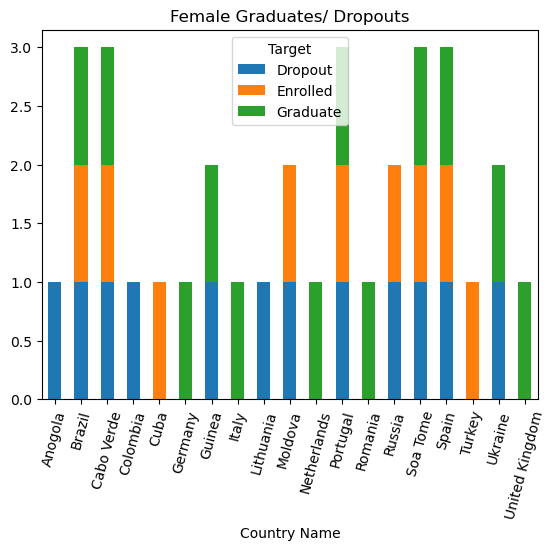

In [227]:
# Stacked Bar graph of female students who graduated, dropout, enrolled 
female_stats.groupby(['Country Name', 'Target']).size().unstack().plot(kind='bar', stacked=True,rot=75,
            title='Female Graduates/ Dropouts')

In [224]:
# Male students: Graduate/Dropout/ Enrolled 
male_stats = success_per_gender[success_per_gender['Gender']==1].value_counts()
male_stats

Country Name  Gender  Target  
Portugal      1       Dropout     692
                      Graduate    536
                      Enrolled    298
Brazil        1       Dropout       6
Soa Tome      1       Graduate      3
                      Enrolled      3
Brazil        1       Enrolled      2
Italy         1       Graduate      2
Anogola       1       Enrolled      1
Spain         1       Graduate      1
                      Enrolled      1
                      Dropout       1
Romania       1       Enrolled      1
Mozambique    1       Graduate      1
                      Enrolled      1
Mexico        1       Graduate      1
                      Dropout       1
Germany       1       Graduate      1
Cabo Verde    1       Graduate      1
                      Dropout       1
Brazil        1       Graduate      1
Ukraine       1       Graduate      1
dtype: int64

<Axes: title={'center': 'Male Graduates/ Dropouts'}, xlabel='Country Name'>

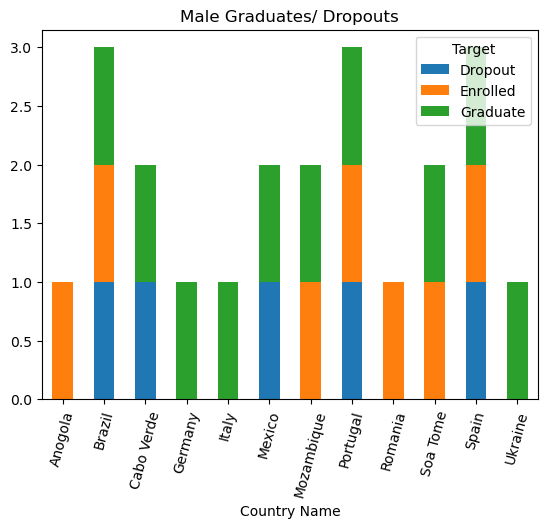

In [229]:
# Stacked Bar graph of male students who graduated, dropout, enrolled 
male_stats.groupby(['Country Name', 'Target']).size().unstack().plot(kind='bar', stacked=True,rot=75,
            title='Male Graduates/ Dropouts')


In [136]:
# DataFrame of Gender , Martial status, Target columns
# Marital status leger: 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated
success_per_ms = student_success[['Gender','Target','Marital status']]
success_per_ms.reset_index()

,Country Name,Gender,Target,Marital status
0,Portugal,1,Dropout,1
1,Portugal,1,Graduate,1
2,Portugal,1,Dropout,1
3,Portugal,0,Graduate,1
4,Portugal,0,Graduate,2
...,...,...,...,...
4419,Portugal,1,Graduate,1
4420,Russia,0,Dropout,1
4421,Portugal,0,Dropout,1
4422,Portugal,0,Graduate,1


In [137]:
# Counts 
success_per_ms.value_counts()

Gender  Target    Marital status
0       Graduate  1                 1528
1       Dropout   1                  593
0       Dropout   1                  591
1       Graduate  1                  487
0       Enrolled  1                  433
1       Enrolled  1                  287
0       Graduate  2                   96
1       Dropout   2                   90
0       Dropout   2                   89
1       Graduate  2                   52
0       Enrolled  2                   36
        Dropout   4                   28
        Graduate  4                   27
1       Enrolled  2                   16
0       Enrolled  4                   14
1       Dropout   4                   14
0       Graduate  5                    9
        Dropout   5                    8
1       Graduate  4                    6
        Dropout   5                    3
0       Dropout   6                    3
        Enrolled  3                    2
1       Enrolled  4                    2
                  5     

In [183]:
# DataFrame of Gender, Parent occuplation( Mother & Father) , Target columns
# Mother's occupation: 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants
# Father's occupation: 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers
paternal_occup = student_success[['Gender','Target',"Mother's occupation","Father's occupation"]]
paternal_occup

,Gender,Target,Mother's occupation,Father's occupation
Country Name,,,,
Portugal,1,Dropout,5,9
Portugal,1,Graduate,3,3
Portugal,1,Dropout,9,9
Portugal,0,Graduate,5,3
Portugal,0,Graduate,9,9
...,...,...,...,...
Portugal,1,Graduate,5,4
Russia,0,Dropout,9,9
Portugal,0,Dropout,9,9


In [176]:
# Gradautes per paternal occupation 
grad_per_po = paternal_occup[paternal_occup['Target']=='Graduate']
grad_per_po

,Gender,Target,Mother's occupation,Father's occupation
Country Name,,,,
Portugal,1,Graduate,3,3
Portugal,0,Graduate,5,3
Portugal,0,Graduate,9,9
Portugal,1,Graduate,9,7
Portugal,0,Graduate,7,10
...,...,...,...,...
Portugal,0,Graduate,9,9
Portugal,1,Graduate,3,9
Portugal,1,Graduate,5,4


In [181]:
# Counts 
grad_per_po.value_counts()

Gender  Target    Mother's occupation  Father's occupation
0       Graduate  9                    9                      276
1       Graduate  9                    9                      111
0       Graduate  9                    7                      104
                  5                    5                       82
                  7                    7                       67
                                                             ... 
                  153                  153                      1
                                       135                      1
                  152                  171                      1
                  151                  193                      1
1       Graduate  194                  194                      1
Length: 219, dtype: int64

In [259]:
# Relative Counts 
grad_per_po.value_counts(normalize=True)

Gender  Target    Mother's occupation  Father's occupation
0       Graduate  9                    9                      0.124943
1       Graduate  9                    9                      0.050249
0       Graduate  9                    7                      0.047080
                  5                    5                      0.037121
                  7                    7                      0.030330
                                                                ...   
                  153                  153                    0.000453
                                       135                    0.000453
                  152                  171                    0.000453
                  151                  193                    0.000453
1       Graduate  194                  194                    0.000453
Length: 219, dtype: float64

In [231]:
# Dropouts per paternal occupation 
grad_per_drop = paternal_occup[paternal_occup['Target']=='Dropout']
grad_per_drop

,Gender,Target,Mother's occupation,Father's occupation
Country Name,,,,
Portugal,1,Dropout,5,9
Portugal,1,Dropout,9,9
Portugal,1,Dropout,9,9
Portugal,0,Dropout,4,7
Portugal,0,Dropout,4,9
...,...,...,...,...
Portugal,1,Dropout,9,9
Portugal,1,Dropout,9,3
Portugal,0,Dropout,6,6


In [232]:
#Counts 
grad_per_drop.value_counts()

Gender  Target   Mother's occupation  Father's occupation
0       Dropout  9                    9                      132
1       Dropout  9                    9                      109
0       Dropout  0                    0                       39
1       Dropout  4                    4                       31
                 0                    0                       30
                                                            ... 
0       Dropout  90                   8                        1
                                      5                        1
                                      3                        1
                 9                    99                       1
1       Dropout  134                  112                      1
Length: 197, dtype: int64

In [258]:
# Relative Counts 
grad_per_drop.value_counts(normalize=True)

Gender  Target   Mother's occupation  Father's occupation
0       Dropout  9                    9                      0.092892
1       Dropout  9                    9                      0.076707
0       Dropout  0                    0                      0.027445
1       Dropout  4                    4                      0.021816
                 0                    0                      0.021112
                                                               ...   
0       Dropout  90                   8                      0.000704
                                      5                      0.000704
                                      3                      0.000704
                 9                    99                     0.000704
1       Dropout  134                  112                    0.000704
Length: 197, dtype: float64

## Summary 

Portugal came in first with the most participants making up 97% of the data with 4314 participants. This could be a result of available education in the country or it can be due to the geographic location of the insulation. Brazil came in second with 0.85%. With Turkey, Netherlands, Colombia, Cuba, United Kingdom, and Lithuania coming in under 0.026%. I choose to focus on the educational enrollment of each country (based on the participants' nationality) focusing on 2 features: adjustment net enrollment of lower secondary and tertiary education enrollment. In lower secondary enrollment, Lithuania came first with 99.41, the United Kingdom second with 96.08, and Spain in third with 94.08. Mozambique had the lowest secondary enrollment. When analyzing tertiary education enrollment, Brazil had the highest enrollment with 8072146. Turkey came second with an enrollment of 5472521, and Mexico with the third highest enrollment of 3419391. It was not a surprise to see that Portugal was on the lower end of tertiary education enrollment as a majority of the participants were from Portugal. Indicating a possibility that most students in Portugal seek tertiary education outside of Portugal. 
Next I proceed to check the admission grades of each county, averaging only the countries with at least 5 participants or more. Cabo Verde came in with the highest admission grade averaging 143.49. Portugal averaged 126.92, Brazil with 121.18, Soa Tome with 132.81, Spain with 128.55, and finally Guinea averaged 124.38. 

Analyzing the student data 2209 students graduated while 1421 dropped out. With only 794 students enrolled. Portugal came up with the highest drop-out with 1389 participants. This is not the best global indication as the participants were majority from Portugal. Angola, Colombia, Guinea, Lithuania, Mexico, Russia, Sao Tome, and Ukraine all have come up with 1 student. As expected Portugal resulted with the highest graduation rate of 2155 participants. There were a total of 4424 participants: 2868 were female and 1556 were male. The majority of both sexes came from Portugal with 2788 female participants and 1526 male participants. 

Next analyzed the relationship between scholarship holder and graduate rates. From Portugal 37% of the participants who were scholarship holders graduated while 9% dropped out. Less than 1% of Brazilian, Spaniard, Guinea , and Mexican partiants graduated and dropped out who were scholarship holders. There were a total of 4,424 participants: 2868 female and 1556 male. Portugal had the highest graduating female count with 1619. Italy, United Kingdom, Germany, Ukraine all tied with 1. Portugal came in first again with the most males graduating with 692. Lastly I analyzed the relationship between paternal occupation and grad rates. The participants whose parents were “unskilled workers” had the highest dropout rate with 9%, totaling 241 participants. Surprisingly the occupation with the highest graduation rate was “unskilled workers”with 12%, totaling 387 participants.  
